In [1]:
!pip install wget
!pip install urllib3

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from datetime import datetime,timedelta
import pytz 
from collections import OrderedDict

from urllib.request import urlopen

In [21]:
#!git clone https://github.com/CovidToday/backend

In [22]:
if os.path.exists("test.json"):
  os.remove("test.json")
wget.download('https://api.covid19india.org/v3/data-all.json', os.path.join(os.getcwd(),'test.json')) #os.path.join instead of concating string together

'/content/test.json'

In [23]:
# Removed bulky fn and convert code
# Handles errors too
'''
def fn(mon):
  if(mon == "01"):
    return " January"
  if(mon == "02"):
    return " February"
  if(mon == "03"):
    return " March"
  if(mon == "04"):
    return " April"
  if(mon == "05"):
    return " May"
  if(mon == "06"):
    return " June"
  if(mon == "07"):
    return " July"
  if(mon == "08"):
    return " August"
  if(mon == "09"):
    return " September"
  if(mon == "10"):
    return " October"
  if(mon == "11"):
    return " November"
  if(mon == "12"):
    return " December"
'''

def convert(dat): 
    return datetime.strptime(dat, '%Y-%m-%d').strftime('%d %B')


In [24]:
dt = '2020-05-30'
convert(dt)

'30 May'

In [25]:
# maybe helpful 

def split_date_json(pos_rate_json,state):
  td =  pd.DataFrame(pos_rate_json[state]['dates'])
  
  df = td.apply(lambda x: [x[0][:3],x[0][3:]],  result_type="expand",axis=1)
  df.columns=['date','month']
  return df

In [26]:
dataset=pd.read_csv('https://raw.githubusercontent.com/CovidToday/backend/master/testing-and-cfr/population.csv')
population=pd.DataFrame()
population["State"]=dataset['State'][:37]
population["Population"]=dataset['Population'][:37]
population=population.set_index('State')

In [27]:
state_id = {
  "TT":"India",
  "MH":"Maharashtra",
  "TN":"Tamil Nadu",
  "DL":"Delhi",
  "GJ":"Gujarat",
  "RJ":"Rajasthan",
  "UP":"Uttar Pradesh",
  "MP":"Madhya Pradesh",
  "WB":"West Bengal",
  "KA":"Karnataka",
  "BR":"Bihar",
  "AP":"Andhra Pradesh",
  "HR":"Haryana",
  "TG":"Telangana",
  "JK":"Jammu and Kashmir",
  "OR":"Odisha",
  "PB":"Punjab",
  "AS":"Assam",
  "KL":"Kerala",
  "UT":"Uttarakhand",
  "JH":"Jharkhand",
  "CT":"Chhattisgarh",
  "TR":"Tripura",
  "HP":"Himachal Pradesh",
  "CH":"Chandigarh",
  "GA":"Goa",
  "MN":"Manipur",
  "NL":"Nagaland",
  "PY":"Puducherry",
  "LA":"Ladakh",
  "AR":"Arunachal Pradesh",
  "AN":"Andaman and Nicobar Islands",
  "ML":"Meghalaya",
  "MZ":"Mizoram",
  "DN":"Dadra and Nagar Haveli and Daman and Diu",
  "SK":"Sikkim",
}

In [28]:
#Changed

'''
from datetime import timedelta
start=datetime.now()
x1=datetime.now(pytz.timezone('Asia/Kolkata')).date()
#x1 = datetime.today()
#y1 = timedelta(days=7)
y1=[]
#x1=str(x1)[:10]
for i in range(7,0,-1):
  y1.append(str(datetime.today()-timedelta(days=i))[:10])
#print(y1)
##y1=str(y1)[:10]
t=y1
t
'''
def dates_gen(periods=7):
  t = pd.Series(pd.date_range(end = datetime.now(pytz.timezone('Asia/Kolkata'))-timedelta(1), periods = periods)).dt.strftime('%Y-%m-%d').tolist()

  return t

In [29]:
t=dates_gen()

#Positive Rate (All metrics)



In [30]:
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

#New
csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []
'''
#Proposed method

test_json_url = 'https://api.covid19india.org/v3/data-all.json'
test_json = json.loads(urlopen(test_json_url).read())

posrat_json_url = 'https://raw.githubusercontent.com/CovidToday/backend/master/testing-and-cfr/positivity_Rate.json'
posrat_json = json.loads(urlopen(posrat_json_url).read())


test =test_json
temp1 = posrat_json

'''
#Old method
#test = json.load(open('test.json'))
test_json_url = 'https://api.covid19india.org/v3/data-all.json'
test_json = json.loads(urlopen(test_json_url).read())

test = test_json
temp1 = json.load(open('positivity_Rate.json'))


for date in t:  
 
  states={}
  temp = test[date]
  

  for i,j in enumerate(state_id.keys()):
    k = state_id[j]
    #print('posrate() -- Working : ',state_id[j])

    test_per_million = temp1[k]['test_per_million']
    pos_cum = temp1[k]['cum_positive_cases']
    pos_rate_cum = temp1[k]['cum_positivity_rate']
    daily_pos = temp1[k]['daily_positive_cases']
    daily_pos_ma = temp1[k]['daily_positive_cases_ma']
    daily_pos_rate = temp1[k]['daily_positivity_rate']
    daily_pos_rate_ma = temp1[k]['daily_positivity_rate_ma']
    tested_cum = temp1[k]['cum_tests']
    daily_tested = temp1[k]['daily_tests']
    deceased_cum = temp1[k]['cum_deceased']
    daily_deceased = temp1[k]['daily_deceased']
    recovered_cum = temp1[k]['cum_recovered']
    daily_recovered = temp1[k]['daily_recovered'] 
    
    
    
    #New added
    daily_case_per_million  = temp1[k]['daily_cases_per_million']
    daily_test_per_million  = temp1[k]['daily_tests_per_million']
    daily_test_ma  = temp1[k]['daily_tests_ma']
    daily_deceased_ma  = temp1[k]['daily_deceased_ma']
  
    dates=temp1[k]['dates']
    if convert(date) not in dates :
      print(1)
      dates.append(convert(date))
      test_per_million.append('')
      pos_cum.append('')
      pos_rate_cum.append('')
      daily_pos.append('')
      daily_pos_ma.append('')
      daily_pos_rate.append('')
      daily_pos_rate_ma.append('')
      tested_cum.append('')
      daily_tested.append('')
      deceased_cum.append('')
      daily_deceased.append('')
      recovered_cum.append('')
      daily_recovered.append('')
      
      #New added
      print("Appends")
      daily_case_per_million.append('')
      daily_test_per_million.append('')
      daily_test_ma.append('')
      daily_deceased_ma.append('')

      i=len(dates)-1
      
    for l in range(len(dates)):
      if convert(date)==dates[l]:
        i=l
        break
    

    if k in temp1.keys():
        if 'total' in temp[j].keys():
          if 'confirmed' in temp[j]['total'].keys():
            pos_cum[i]=temp[j]['total']['confirmed']

          if 'tested' in temp[j]['total'].keys():
            tested_cum[i]=abs(temp[j]['total']['tested'])
            test_per_million[i]=temp[j]['total']['tested']*1000000/int(population["Population"][k])
              
          if 'deceased' in temp[j]['total'].keys():
            deceased_cum[i]=temp[j]['total']['deceased']
          
          if 'recovered' in temp[j]['total'].keys():
            recovered_cum[i]=temp[j]['total']['recovered']
          
          if len(str(pos_cum[i])) and len(str(tested_cum[i])):
            pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

        if 'delta' in temp[j].keys():
          if 'confirmed' in temp[j]['delta'].keys():
            daily_pos[i]=temp[j]['delta']['confirmed']
            daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][k])   #New

          if 'tested' in temp[j]['delta'].keys():
            daily_tested[i]=abs(temp[j]['delta']['tested'])
            daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][k])    #New

          if 'deceased' in temp[j]['delta'].keys():
            daily_deceased[i]=temp[j]['delta']['deceased']
          
          if 'recovered' in temp[j]['delta'].keys():
            daily_recovered[i]=temp[j]['delta']['recovered']
          
          if len(str(daily_pos[i])) and len(str(daily_tested[i])):
            daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])
    
   
    for w in range(7,len(daily_pos)):
      sum1=0
      sum2=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          sum2+=int(daily_tested[w-s])
      if (sum2!=0):
        daily_pos_rate_ma[w]=sum1*100/abs(sum2)
    
    for w in range(7,len(daily_pos)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_pos[w-s]))!=0):
          sum1+=int(daily_pos[w-s])
          count+=1
      if count!=0:
        daily_pos_ma[w]=sum1/count
  
    #New
    for w in range(7,len(daily_tested)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_tested[w-s])
        
          count+=1
      if count!=0:
        daily_test_ma[w]=sum1/count
        
    #New
    for w in range(7,len(daily_deceased)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_deceased[w-s]))!=0):
          sum1+=int(daily_deceased[w-s])
          count+=1
      if count!=0:
        daily_deceased_ma[w]=sum1/count
   
    
    #print(len)
    st=state_id[j]
    for i in range(len(dates)):
      '''
      if i  == len(dates)//4:
        print("Progress : 25%")
      if i  == len(dates)//2:
        print("Progress : 50%")
      if i  == (len(dates)*3)//4:
        print("Progress : 75%")  
      if i  == len(dates)-1:
        print("Progres : 100&")
      '''
      csv_dates.append(dates[i])
      csv_states.append(st)
      csv_total_cases.append(pos_cum[i])
      csv_positivity_rate_cumulative.append(pos_rate_cum[i])
      csv_daily_positive_cases.append(daily_pos[i])
      csv_cum_recovered.append(recovered_cum[i])
      csv_daily_recovered.append(daily_recovered[i])
      csv_cum_deceased.append(deceased_cum[i])
      csv_daily_deceased.append(daily_deceased[i])
      csv_daily_positivity_rate.append(daily_pos_rate[i])
      csv_daily_positive_cases_ma.append(daily_pos_ma[i])
      csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
      csv_daily_tested.append(daily_tested[i])
      csv_cum_tested.append(tested_cum[i])
      csv_test_per_million.append(test_per_million[i])

      #New
      csv_daily_case_per_million.append(daily_case_per_million[i])
      csv_daily_test_per_million.append(daily_test_per_million[i])
      csv_daily_test_ma.append(daily_test_ma[i])
      csv_daily_deceased_ma.append(daily_deceased_ma[i])
    
    #print(st)
    states[st]={
                    'dates':dates,
                    'cum_positive_cases':pos_cum,
                    'cum_positivity_rate':pos_rate_cum,
                    'daily_positive_cases':daily_pos,
                    'cum_recovered':recovered_cum,
                    'daily_recovered':daily_recovered,
                    'cum_deceased':deceased_cum,
                    'daily_deceased':daily_deceased,
                    'daily_positivity_rate':daily_pos_rate,
                    'daily_positive_cases_ma': daily_pos_ma,
                    'daily_positivity_rate_ma':daily_pos_rate_ma , 
                    'daily_tests': daily_tested,
                    'cum_tests': tested_cum,
                    'test_per_million':test_per_million,
                    #New
                    'daily_cases_per_million':daily_case_per_million,
                    'daily_tests_per_million':daily_test_per_million,
                    'daily_tests_ma':daily_test_ma,
                    'daily_deceased_ma':daily_deceased_ma

                   }
      
  states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
  with open('positivity_Rate.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)

#CSV

In [31]:
n_states = len(state_id.keys())
n_dates = len(dates)

rows = n_states*n_dates


df=pd.DataFrame()
df['dates']=csv_dates[:rows]
df['state']=csv_states[:rows]
df['cum_positive_cases']=csv_total_cases[:rows]
df['cum_positivity_rate']=csv_positivity_rate_cumulative[:rows]

df['cum_recovered']=csv_cum_recovered[:rows]
df['daily_recovered']:csv_daily_recovered[:rows]
df['cum_deceased']=csv_cum_deceased[:rows]
df['daily_deceased']=csv_daily_deceased[:rows]
df['daily_positive_cases']=csv_daily_positive_cases[:rows]
df['daily_positivity_rate']=csv_daily_positivity_rate[:rows]
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma[:rows]
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma[:rows]
df['daily_tests']=csv_daily_tested[:rows]
df['cum_tested']=csv_cum_tested[:rows]
df['test_per_million']=csv_test_per_million[:rows]

#New
df['daily_cases_per_million'] = csv_daily_case_per_million[:rows]
df['daily_tests_per_million'] = csv_daily_test_per_million[:rows]
df['daily_tests_ma'] = csv_daily_test_ma[:rows]
df['daily_deceased_ma'] = csv_daily_deceased_ma[:rows]

df.to_csv('positivity_Rate.csv',index=False)

In [32]:
df.columns

Index(['dates', 'state', 'cum_positive_cases', 'cum_positivity_rate',
       'cum_recovered', 'cum_deceased', 'daily_deceased',
       'daily_positive_cases', 'daily_positivity_rate',
       'daily_positive_cases_ma', 'daily_positivity_rate_ma', 'daily_tests',
       'cum_tested', 'test_per_million', 'daily_cases_per_million',
       'daily_tests_per_million', 'daily_tests_ma', 'daily_deceased_ma'],
      dtype='object')

In [33]:
df[df['state']=='India']

,dates,state,cum_positive_cases,cum_positivity_rate,cum_recovered,cum_deceased,daily_deceased,daily_positive_cases,daily_positivity_rate,daily_positive_cases_ma,daily_positivity_rate_ma,daily_tests,cum_tested,test_per_million,daily_cases_per_million,daily_tests_per_million,daily_tests_ma,daily_deceased_ma
0,30 January,India,1,,,,,1,,,,,,,,,,
1,31 January,India,,,,,,,,,,,,,,,,
2,01 February,India,,,,,,,,,,,,,,,,
3,02 February,India,2,,,,,1,,,,,,,,,,
4,03 February,India,3,,,,,1,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,09 August,India,2214137,9.00658,1534278,44466,1013,62117,13.0218,58470.6,9.34312,477023,24583558,17926.4,45.2959,347.847,625814,899.714
192,10 August,India,2267153,8.96751,1581640,45353,887,53016,7.59226,58831.7,9.32336,698290,25281848,18435.6,38.6594,509.195,631014,911.286
193,11 August,India,2328405,8.95014,1638101,46188,835,61252,8.35123,60256,9.30924,733449,26015297,18970.4,44.6651,534.833,647271,909.286
194,12 August,India,2395471,8.92311,1695860,47138,950,67066,8.07644,61747.4,9.2036,830391,26845688,19576,48.9047,605.524,670905,913.714


# CFR

In [34]:
#dates = np.array([pd.to_datetime(i['date']) for i in filter(lambda v: v['status'] == 'Confirmed',json.load(open('states.json',))['states_daily'])])
#print(dates)
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()

for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [35]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

In [36]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

cfr() -- Working :  India
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


cfr() -- Working :  Maharashtra
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Tamil Nadu


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Delhi


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Gujarat
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Rajasthan
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Uttar Pradesh
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Madhya Pradesh
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  West Bengal
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Karnataka
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Bihar
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Andhra Pradesh
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Haryana
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Telangana
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  J

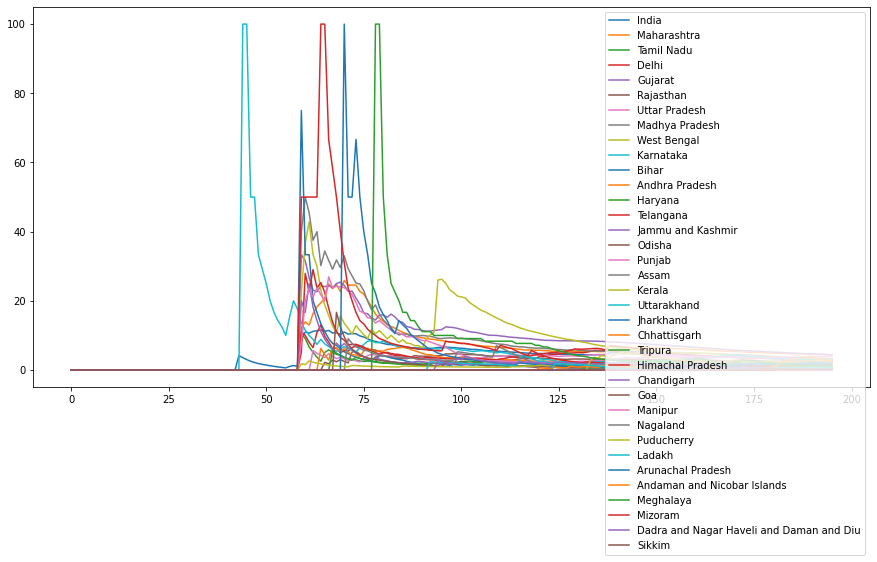

In [37]:
json_data={}
cfr = pd.DataFrame()
final=pd.DataFrame
plt.figure(1, figsize=(15, 7))
for st in state_id.keys():
    print("cfr() -- Working : ",state_id[st])

    state=state_id[st]
    boots = 100
    conf = []
    for n in range(boots):
        if n  == boots//4:
          print("Progress : 25%")
        if n  == boots//2:
          print("Progress : 50%")
        if n  == (boots*3)//4:
          print("Progress : 75%")  
        if n  == boots-1:
          print("Progress : 100%")

        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    #temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    dates = states[state]['dates']
    temp = {
        'dates':dates,
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=state_id[st]
    #print(a)
    states[state].update(temp)
    json_data[state] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*len(dates)
    cfr_state['dates']=dates
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [38]:
cfr.to_csv('cfr.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))

In [39]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr.json", "w") as outfile: 
    outfile.write(json_data_indented)

#Doubling Rate

In [40]:
def calc_doublingtimes(x):
    vals = []
    for i in range(x.shape[0]):
        for j in range(i+1,x.shape[0]):
            if len(str(x[j])) and len(str(x[i])):
                vals.append(np.log(2)*(j-i)/np.log(int(x[j])/int(x[i])))
    if not vals:
        return 0,0,0
    return np.median(vals),np.quantile(vals,0.025),np.quantile(vals,0.975)

In [41]:
start=datetime.now()
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-30",end=x)
datess=[]
for i in range(len(dd)):
  datess.append((str(dd[i])[:10]))

In [42]:
dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(datess[w]))

In [43]:
json_data={}

test_json_url = 'https://api.covid19india.org/v3/data-all.json'
test_json = json.loads(urlopen(test_json_url).read())
test= test_json

for j in state_id.keys():
    cumul=['']*len(dates)
    st=state_id[j]
    cumul=states[st]['cum_positive_cases']

    cumul_cases=np.array(cumul)
    dbt = np.zeros((3,cumul_cases.shape[0]))
    for i in range(cumul_cases.shape[0]):
        dbt[:,i] = calc_doublingtimes(cumul_cases[i-7:i])
    st=state_id[j]
    json_data[st] = {
            'dates':dates1,
            'dbt_point':pd.Series((list(dbt[0,:]))).fillna('').tolist(),
            'dbt_l95':pd.Series((list(dbt[1,:]))).fillna('').tolist(),
            'dbt_u95':pd.Series((list(dbt[2,:]))).fillna('').tolist()
            }
    states[st].update(json_data[st])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


#Rt Calculation

In [ ]:
def shift_rt(li,day=9):
  collections.deque([1, 2, 3, 4, 5])

In [ ]:
data_recovered = pd.DataFrame()
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    data_confirmed[st] = np.array(states[st]['daily_positive_cases'])
    data_deceased[st] = np.array(states[st]['daily_deceased'])
    data_recovered[st] = np.array(states[st]['daily_recovered'])

In [ ]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

In [ ]:
rt = pd.DataFrame()
# plt.figure(1, figsize=(15, 7))
for st in state_id.keys():
    state=state_id[st]
    temp = pd.DataFrame()
    temp["active"] = data_confirmed[state]
    temp.to_csv('confirmed.csv')
    call(['RScript.exe','scripts/boot_rt_back.R'])
    values = {
            'rt_point':[],
            'rt_sd':[],
            'rt_l95':[],
            'rt_u95':[],
            'rt_l50':[],
            'rt_u50':[],
            't_end':[]
            }
    for df in [pd.read_csv('rt_temp/'+temp) for temp in os.listdir('rt_temp/')]:
        values['rt_point'].append(df['Mean(R)'])
        values['rt_sd'].append(df['Std(R)'])
        values['rt_l95'].append(df['Quantile.0.025(R)'])
        values['rt_u95'].append(df['Quantile.0.975(R)'])
        values['rt_l50'].append(df['Quantile.0.25(R)'])
        values['rt_u50'].append(df['Quantile.0.75(R)'])
        values['t_end'].append(df['t_end']-1)
    for i in values:
        values[i] = np.median(values[i],axis=0)
    values['dates'] = list(data_confirmed['date'][values['t_end']-1])
    rt_state=pd.DataFrame()
    rt_state['state']=[str(state)]*len(values['dates'])
    rt_state['dates']= values['dates']
    rt_state['rt_point'] = values['rt_point']
    rt_state['rt_sd'] = values['rt_sd']    
    rt_state['rt_l95'] = values['rt_l95']    
    rt_state['rt_u95'] = values['rt_u95']    
    rt_state['rt_l50'] = values['rt_l50']
    rt_state['rt_u50'] = values['rt_u50']
    rt=pd.concat([rt, rt_state])
    plt.plot(range(len(values['rt_point'])),values['rt_point'],label=state)
    plt.fill_between(range(len(values['rt_point'])),values['rt_l95'],values['rt_u95'],alpha=0.5)
    plt.ylim(0,4)
    plt.legend()
    plt.show()

In [ ]:
rt.to_csv('rt.csv',index=False)

##Rt Shifting

In [ ]:
def shift_rt_metrics(dict,key,days=9):
  values_shifted = collections.deque(dict[key])
  values_shifted.rotate(-9)

  new_val = list(values_shifted)

  size = len(dict['dates'])
  
  for i in range(days):
    new_val[size-1-i]=''

  return new_val
 

In [ ]:
values_shifted = copy.deepcopy(values)
values_shifted['rt_point'] = shift_rt_metrics(values_shifted,'rt_point')
values_shifted['rt_sd'] = shift_rt_metrics(values_shifted,'rt_sd')
values_shifted['rt_l95'] = shift_rt_metrics(values_shifted,'rt_195')
values_shifted['rt_u95'] = shift_rt_metrics(values_shifted,'rt_u96')
values_shifted['rt_l50'] = shift_rt_metrics(values_shifted,'rt_150')
values_shifted['rt_u50'] = shift_rt_metrics(values_shifted,'rt_u50')
values_shifted['t_end'] = shift_rt_metrics(values_shifted,'t_end')

##Rt changes for review

In [ ]:
print('Last 15 days : ',values_shifted['rt_point'][-15:])
print('Last 15 days : ',values_shifted['u95'][-15:])
print('Last 15 days : ',values_shifted['rt_l95'][-15:])

In [ ]:
with open('rt_shifted.json', 'w') as outfile:
  json.dump(values_shifted, outfile,indent=4)

In [ ]:
swith open('rt.json', 'w') as outfile:
  json.dump(values, outfile,indent=4)

In [ ]:
df_list = [df,cfr,rt]
all_dataframes = pd.concat(df_list)
all_dataframes.to_csv('complete_districts_all_metrics.csv',index=False)

#Pooling

In [44]:
print("No of days of data present: ",len(dates))
print("Data rows for state dict: ",len(states['India']['dbt_u95']))
print("No. of states : ",len(states.keys())-1)

No of days of data present:  196
Data rows for state dict:  196
No. of states :  36


In [45]:
print("Date updated : ",states['datetime'])

Date updated :  2020-08-14 02:18:32.714284+05:30


In [46]:
cols=list(states['India'].keys())
q=['state']
complete=pd.DataFrame(columns=q+cols)
keys=list(states.keys())[:-1]
for i in keys:
  temp=pd.DataFrame()
  temp['state']=[str(i)]*len(states['India']['dates'])
  for j in cols:

    temp[j]=list(states[i][j])
  complete = pd.concat([complete,temp])

In [47]:
complete.to_csv('com.csv',index=False)

In [48]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("doubling_rate.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [49]:
states_indented = json.dumps(states, indent = 4)
with open("covidtoday.json", "w") as outfile: 
    outfile.write(states_indented)

In [50]:
complete.columns

Index(['state', 'dates', 'cum_positive_cases', 'cum_positivity_rate',
       'daily_positive_cases', 'cum_recovered', 'daily_recovered',
       'cum_deceased', 'daily_deceased', 'daily_positivity_rate',
       'daily_positive_cases_ma', 'daily_positivity_rate_ma', 'daily_tests',
       'cum_tests', 'test_per_million', 'daily_cases_per_million',
       'daily_tests_per_million', 'daily_tests_ma', 'daily_deceased_ma',
       'cfr1_point', 'cfr2_point', 'cfr3_point', 'cfr3_l95', 'cfr3_u95',
       'cfr3_l50', 'cfr3_u50', 'dbt_point', 'dbt_l95', 'dbt_u95'],
      dtype='object')